# Human Diffusion

### A Q-Learning Process About The Human Migration From Africa

We start by importing the proper modules (equivalent to libraries in R).

These are

- NumPy
- MatPlotLib
- PIL, (Pillow) an image handler
- tqdm, (pronounced ta-qa-dum) from Arabic (taqadum, تقدّم) meaning *progress*, is a simple progress bar to be able to estimate the time for each task



In [1]:
#pip install -r requirements.txt

In [2]:
from earth import Earth

## Generating the Map
We initialise the picture that we want to use, and convert it into pixel values, so we can have a pure black and white image of the earth to use.

In [3]:
stage = Earth('earth.jpg')

The following forloop checks each individual pixel and the converts it to black or white. The threshold was found through running the loop many times and picking a number that looked good enough.

In [4]:
stage.black_and_white('newPixels.csv', 'pure-bw-earth.jpg')

100%|██████████| 2407680/2407680 [00:00<00:00, 2465096.60it/s]


We then generate the new picture and save it before we convert it into an array.

In [5]:
stage.generate_image('pure-bw-earth.jpg')

100%|██████████| 1254/1254 [00:03<00:00, 331.85it/s]


We are now ready to create the map we will need.

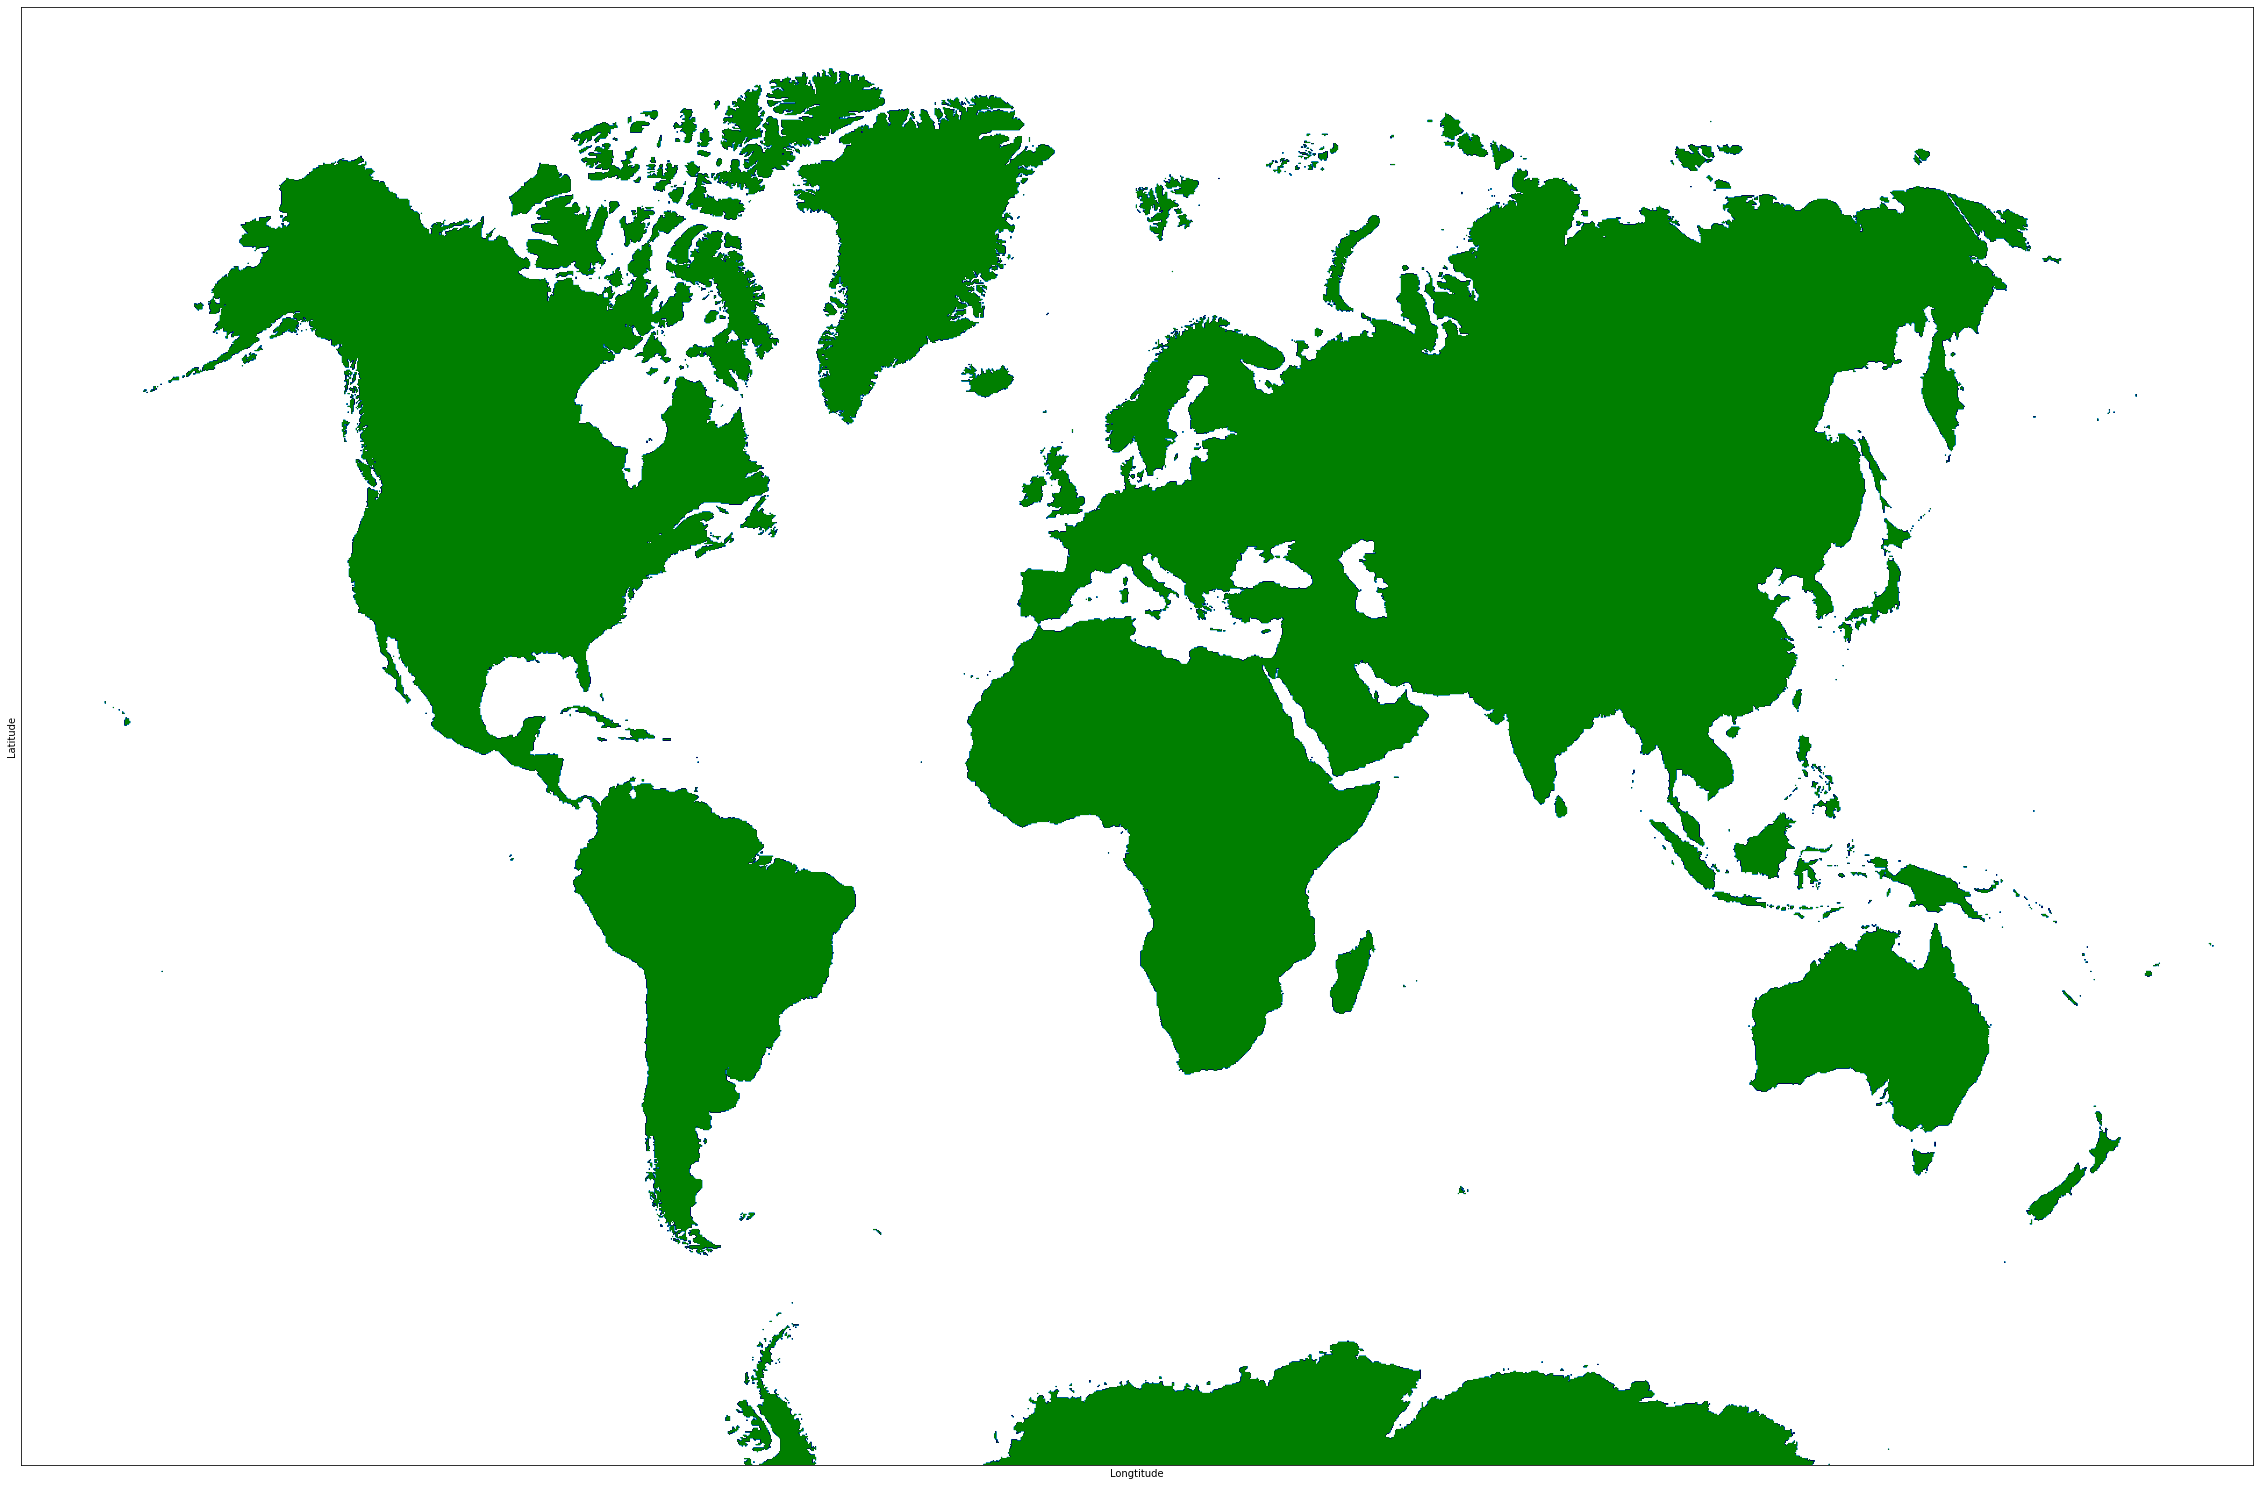

In [6]:
stage.plot('map.jpg')

Now that we have our map ready, we can move on to the implementation of the algorithm.

## Q-Learning

First we need to define the actions that the program will use, which will be the ability to go north, south, west, and east.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
actions = ['north', 'south', 'west', 'east']

Then we can generate the Q-map, which gives the rewards.

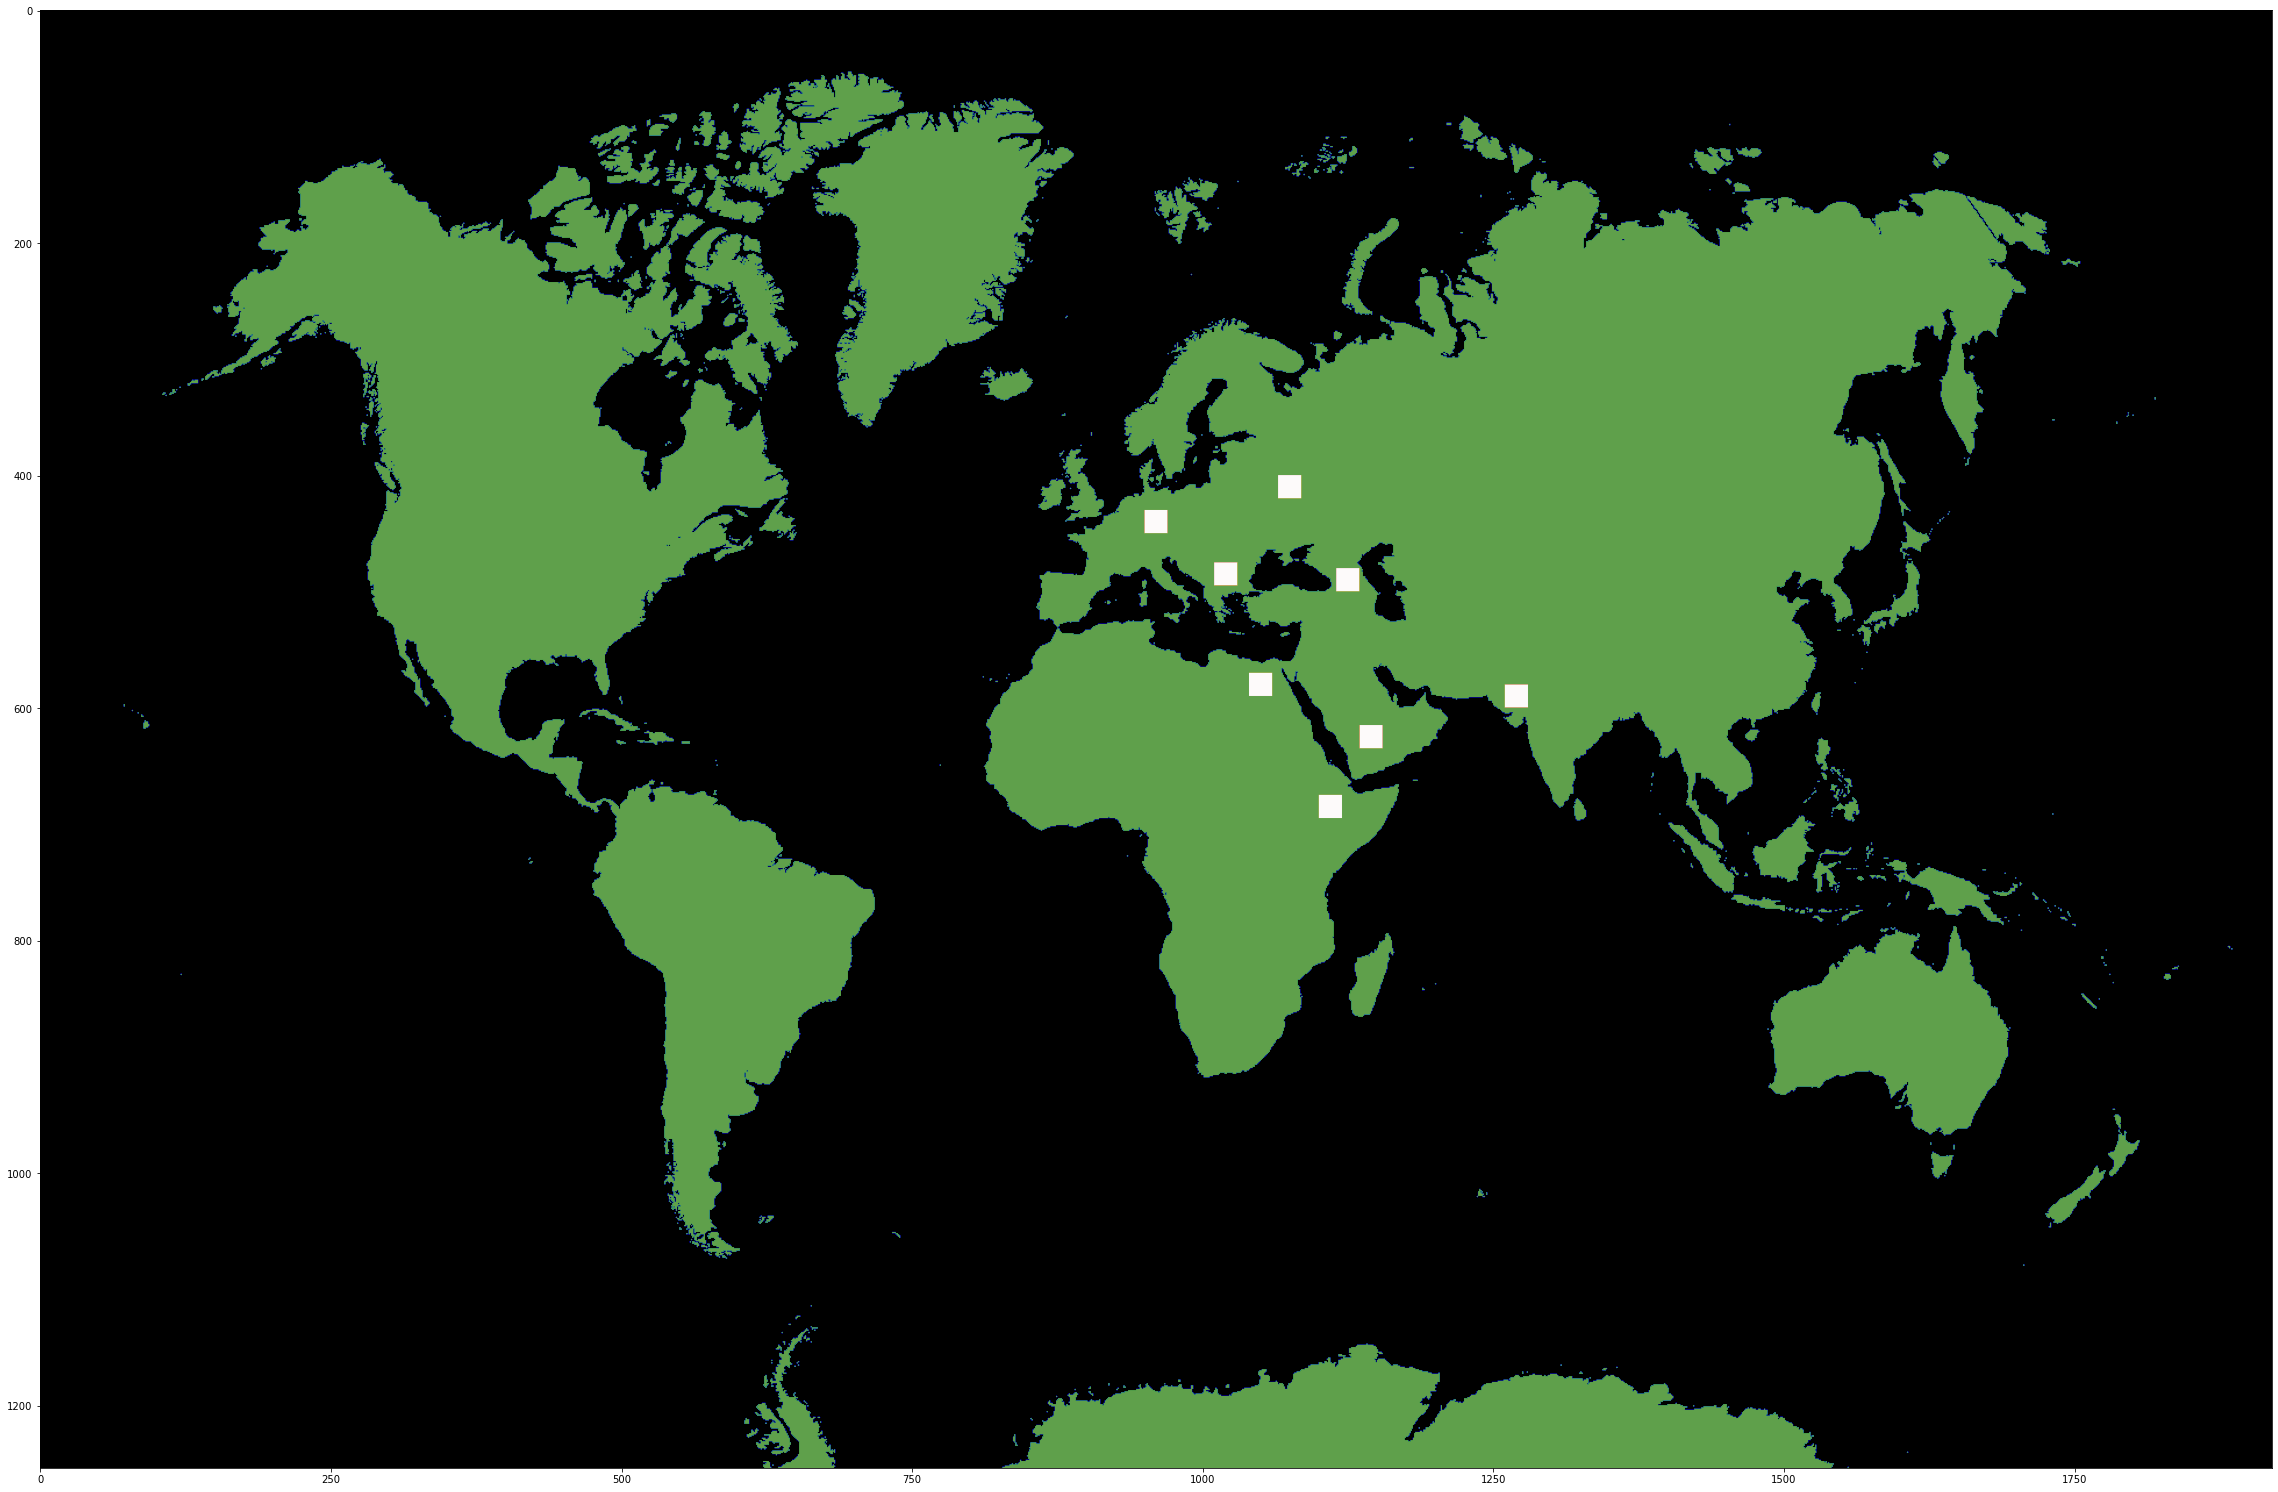

In [9]:
qmap = np.ones(shape=(stage.height,stage.width))
qmap[np.where(stage.map > 0)] = -100

#Ethiopia
qmap[675:695, 1100:1120] = 100

#Egypt
qmap[570:590, 1040:1060] = 100

#Caucasus
qmap[480:500, 1115:1135] = 100

#Balkans
qmap[475:495, 1010:1030] = 100

#India
qmap[580:600, 1260:1280] = 100

#Russia
qmap[400:420, 1065:1085] = 100

#Europe
qmap[430:450, 950:970] = 100

#Arabia
qmap[615:635, 1135:1155] = 100




plt.figure(figsize=(40,40))
plt.imshow(qmap, cmap='gist_earth')
plt.show()